<a href="https://colab.research.google.com/github/how-to-train-your-model/data-science-portfolio/blob/main/Digit_Recognizer_M6_M7_Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2018 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import plotly.express as px
#import pwlf

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score, make_scorer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_predict 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_validate
from sklearn import preprocessing
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier
from sklearn import metrics
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.base import BaseEstimator, TransformerMixin


from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.layers import Conv2D, Input, LeakyReLU, Dense, Activation, Flatten, Dropout, MaxPool2D
from keras import models
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

from tensorflow.keras import layers
from tensorflow.keras import models
import tensorflow as tf
from tensorflow import keras


import pickle



from datetime import datetime


%matplotlib inline
sns.set()

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


## Import the MNIST dataset

Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
  </tr>
  <tr>
    <td>0</td>
  </tr>
  <tr>
    <td>1</td>
  </tr>
    <tr>
    <td>2</td>
  </tr>
    <tr>
    <td>3</td>
  </tr>
    <tr>
    <td>4</td>
  </tr>
    <tr>
    <td>5</td>
  </tr>
    <tr>
    <td>6</td>
  </tr>
    <tr>
    <td>7</td>
  </tr>
    <tr>
    <td>8</td>
  </tr>
    <tr>
    <td>9</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [ ]:
class_names = ['Zero', 'One', 'Two', 'Three', 'Four',
               'Five', 'Six', 'Seven', 'Eight', 'Nine']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls -l "/content/drive/My Drive/Colab_Notebooks/MSDS-422/W6_7"

total 127315
-rw------- 1 root root    74807 Feb 21 07:26 'Digit Recognizer_M6_M7_PP_Image classification_2_layer_10_Nodes.ipynb'
-rw------- 1 root root  2399409 Feb 21 07:13 'Digit Recognizer_M6_M7_PP.ipynb'
-rw------- 1 root root      143 Feb 16 19:13 'Module 6 Assignment 1: Digit Recognizer (Kaggle) - 422_PP.gdoc'
-rw------- 1 root root      143 Feb 21 07:23 'Module 7: Digit Recognizer (Kaggle) - 422_PP.gdoc'
-rw------- 1 root root 51118296 Dec 12  2019  test.csv
-rw------- 1 root root 76775041 Dec 12  2019  train.csv


In [ ]:
#Generalize the file path 
w6_files = "/content/drive/My Drive/Colab_Notebooks/MSDS-422/W6_7"

In [ ]:
#Create dataframe
train_df = pd.read_csv(w6_files+"/train.csv")

test_df = pd.read_csv(w6_files+"/test.csv")

print("Shape of train and test dataset :" , train_df.shape ,test_df.shape)

Shape of train and test dataset : (42000, 785) (28000, 784)


In [ ]:
#Displays 4 handwritten digit images
def display_digits(N):
  """Picks-up randomly N images within the train dataset between 0 and 41999 and displays the images with 4 images/row"""
  images = np.random.randint(low=0, high=42001, size=N).tolist()
  subset_images = train_df.iloc[images,:]
  subset_images.index = range(1, N+1)
  print("Handwritten picked-up digits: \n", subset_images['label'].values)
  subset_images.drop(columns=['label'], inplace=True)
  print('Randomly picked-up images from the training dataset:\n')
  for i, row in subset_images.iterrows():
    plt.subplot((N//8)+1, 8, i)
    pixels = row.values.reshape((28,28))
    plt.imshow(pixels, cmap='Blues')
    plt.xticks([])
    plt.yticks([])
  plt.show()
  return

Handwritten picked-up digits: 
 [1 5 0 6 6 2 6 0 4 3 6]
Randomly picked-up images from the training dataset:



/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


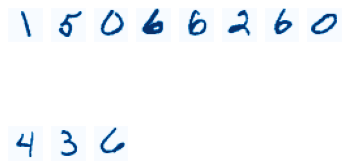

In [ ]:
display_digits(11)

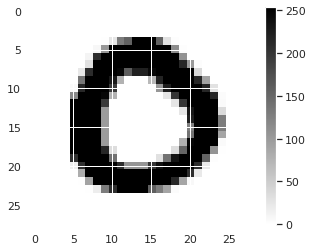

In [ ]:
digit_array = train_df.loc[4, "pixel0":]
arr = np.array(digit_array)

image_array = np.reshape(arr, (28,28))
digit_img = plt.imshow(image_array, cmap=plt.cm.binary)
plt.colorbar(digit_img)

In [ ]:
X0 = train_df.drop(['label'], axis=1)
train_labels = train_df['label']

In [ ]:
# Normalize the data
X1 = X0 / 255.0
test = test_df / 255.0
print("train shape: ",X1.shape)
print("test shape: ",test.shape)



train shape:  (42000, 784)
test shape:  (28000, 784)


In [ ]:
# Reshape
train_images = X1.values.reshape(-1,28,28)
test_images = test.values.reshape(-1,28,28)
print("X shape: ",train_images.shape)
print("test shape: ",test_images.shape)


X shape:  (42000, 28, 28)
test shape:  (28000, 28, 28)


In [ ]:
#(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images, test_images, train_labels, test_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=101)


## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [ ]:
train_images.shape

(33600, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [ ]:
len(train_labels)

33600

Each label is an integer between 0 and 9:

In [ ]:
train_labels

20772    7
10279    7
27518    9
36632    0
2474     1
        ..
12363    7
5695     5
8006     2
17745    9
17931    7
Name: label, Length: 33600, dtype: int64

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [ ]:
test_images.shape

(8400, 28, 28)

And the test set contains 10,000 images labels:

In [ ]:
len(test_labels)

8400

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

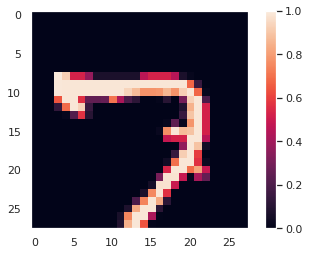

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

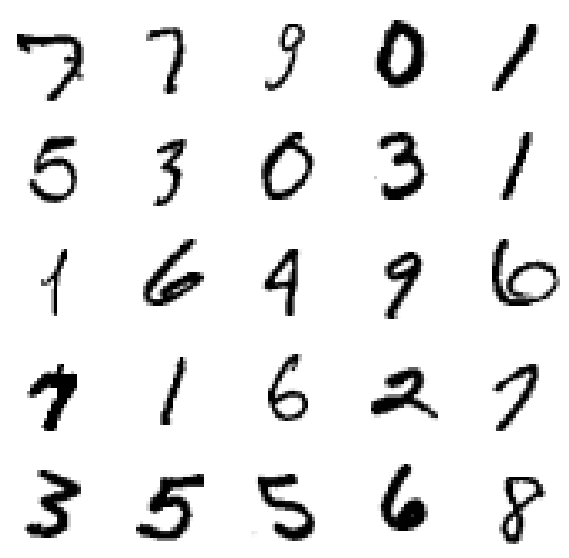

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    #plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers

The basic building block of a neural network is the [*layer*](https://www.tensorflow.org/api_docs/python/tf/keras/layers). Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

## Experiment 1: 2 layers, 10 Nodes

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's [*compile*](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) step:

* [*Loss function*](https://www.tensorflow.org/api_docs/python/tf/keras/losses) —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* [*Optimizer*](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) —This is how the model is updated based on the data it sees and its loss function.
* [*Metrics*](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


### Feed the model

To start training,  call the [`model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method—so called because it "fits" the model to the training data:

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1050/1050 [==============================] - 3s 2ms/step - loss: 1.5222 - accuracy: 0.6362
Epoch 2/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.6837 - accuracy: 0.8330
Epoch 3/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.4940 - accuracy: 0.8700
Epoch 4/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.4157 - accuracy: 0.8878
Epoch 5/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3745 - accuracy: 0.8972
Epoch 6/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3483 - accuracy: 0.9027
Epoch 7/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3306 - accuracy: 0.9063
Epoch 8/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3178 - accuracy: 0.9090
Epoch 9/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3074 - accuracy: 0.9113
Epoch 10/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.298

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

263/263 - 0s - loss: 0.2974 - accuracy: 0.9121 - 496ms/epoch - 2ms/step

Test accuracy: 0.9121428728103638


In [ ]:
history = model.fit(train_images,train_labels, validation_data = (test_images,  test_labels), 
                    epochs=10, verbose = 1)


Epoch 1/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2918 - accuracy: 0.9152 - val_loss: 0.2900 - val_accuracy: 0.9130
Epoch 2/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2853 - accuracy: 0.9170 - val_loss: 0.2879 - val_accuracy: 0.9140
Epoch 3/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2801 - accuracy: 0.9187 - val_loss: 0.2846 - val_accuracy: 0.9148
Epoch 4/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2746 - accuracy: 0.9201 - val_loss: 0.2772 - val_accuracy: 0.9157
Epoch 5/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2696 - accuracy: 0.9210 - val_loss: 0.2759 - val_accuracy: 0.9193
Epoch 6/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2657 - accuracy: 0.9234 - val_loss: 0.2708 - val_accuracy: 0.9199
Epoch 7/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2607 - accuracy: 0.9245 - val_loss: 0.2654 - val_accuracy:

In [ ]:
results = {}
results['experiment1'] = history.history

In [ ]:
def plot_history(model):
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
    ax1.plot(model.history.history['val_accuracy'], 'r', label = 'Validation Accuracy')
    ax1.plot(model.history.history['accuracy'], 'b',label = 'Training Accuracy')
    ax1.set_title('Training and Validation Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.grid()
    ax1.legend(loc = "upper left")
    ax2.plot(model.history.history['val_loss'], 'r',label = 'Validation Loss')
    ax2.plot(model.history.history['loss'], 'b',label = 'Training Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.set_title('Training and Validation loss')
    ax2.grid()
    plt.legend(loc = "upper left")

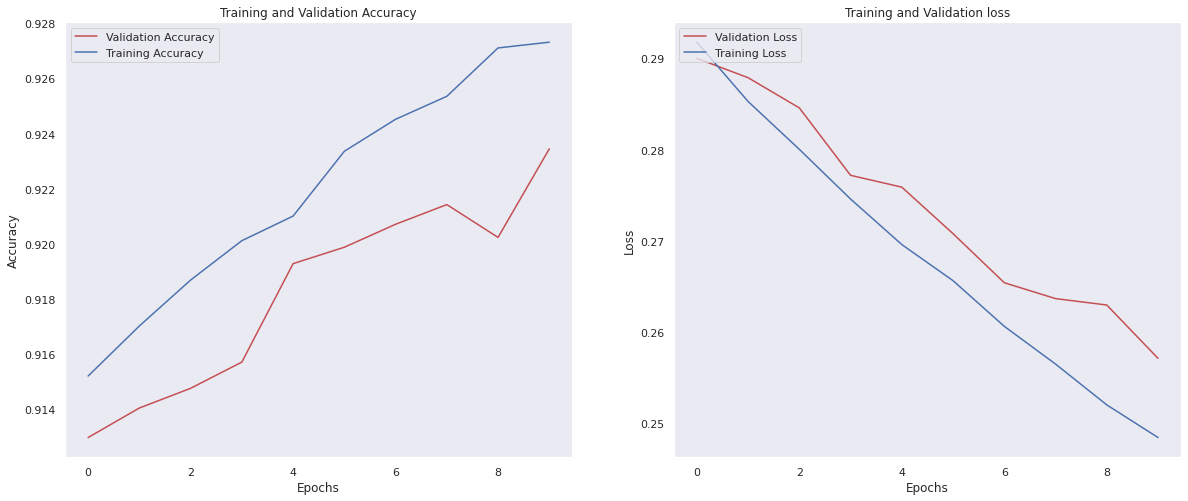

In [ ]:
plot_history(model)

In [ ]:
def plot_confusion_matrix(y_true,y_pred):
    fig = plt.figure(figsize=(12,12))
    #matrix = confusion_matrix(y_true, y_pred)
    sns.heatmap(confusion_matrix(y_true, y_pred),annot=True,fmt='5.0f',cmap="Blues")
    plt.title('Confusion Matrix : Actual v/s Predicted', y=1.05, size=15)
    ax = fig.add_subplot(111)
    plt.xlabel("Predicted Digits")
    plt.ylabel("Actual Digits")
    plt.show()

In [ ]:
model_predict = model.predict(test_images)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


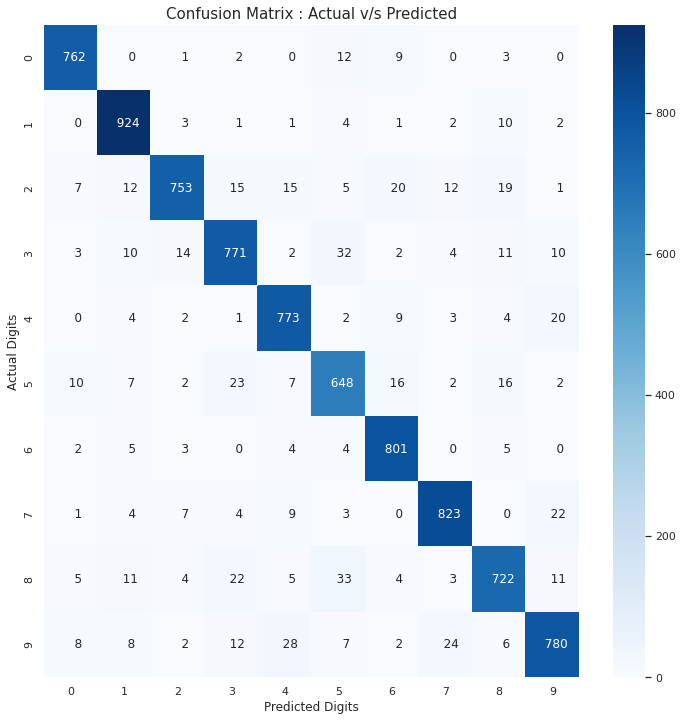

In [ ]:
plot_confusion_matrix(test_labels, model_predict.argmax(axis = 1))


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. For more information, see the following:
*   [Demonstrate overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
*   [Strategies to prevent overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

In [ ]:
modelT_predict = model.predict(train_images)

In [ ]:
print("Overall training Accuracy Score: ", accuracy_score(train_labels, modelT_predict.argmax(axis = 1)))
print(classification_report(train_labels, modelT_predict.argmax(axis = 1)))

print("Overall test Accuracy Score: ", accuracy_score(test_labels, model_predict.argmax(axis = 1)))
print(classification_report(test_labels, model_predict.argmax(axis = 1)))


Overall training Accuracy Score:  0.9292261904761905
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      3343
           1       0.95      0.98      0.96      3736
           2       0.94      0.90      0.92      3318
           3       0.91      0.89      0.90      3492
           4       0.93      0.94      0.93      3254
           5       0.88      0.90      0.89      3062
           6       0.94      0.97      0.95      3313
           7       0.94      0.95      0.94      3528
           8       0.91      0.88      0.90      3243
           9       0.92      0.91      0.91      3311

    accuracy                           0.93     33600
   macro avg       0.93      0.93      0.93     33600
weighted avg       0.93      0.93      0.93     33600

Overall test Accuracy Score:  0.9234523809523809
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       789
           1       0.94      0

### Make predictions

With the model trained, you can use it to make predictions about some images.
Attach a softmax layer to convert the model's linear outputs—[logits](https://developers.google.com/machine-learning/glossary#logits)—to probabilities, which should be easier to interpret.

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [ ]:
predictions[0]

array([7.6066494e-06, 7.3012245e-01, 8.0326032e-03, 1.8889170e-02,
       7.5023836e-03, 1.9065902e-01, 1.0315577e-02, 9.7575324e-04,
       3.1846330e-02, 1.6491641e-03], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [ ]:
np.argmax(predictions[11])

9

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

In [ ]:
type(test_labels)

pandas.core.series.Series

In [ ]:
test_labels.shape

(8400,)

In [ ]:
test_labels.iloc[11]

9

Graph this to look at the full set of 10 class predictions.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

In [ ]:
type(test_images)

numpy.ndarray

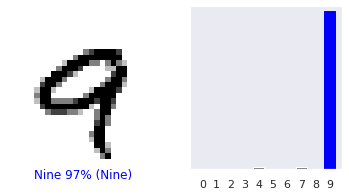

In [ ]:
i = 11
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels.iloc, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels.iloc)
plt.show()

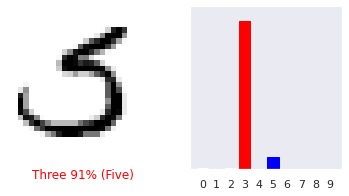

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels.iloc, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels.iloc)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

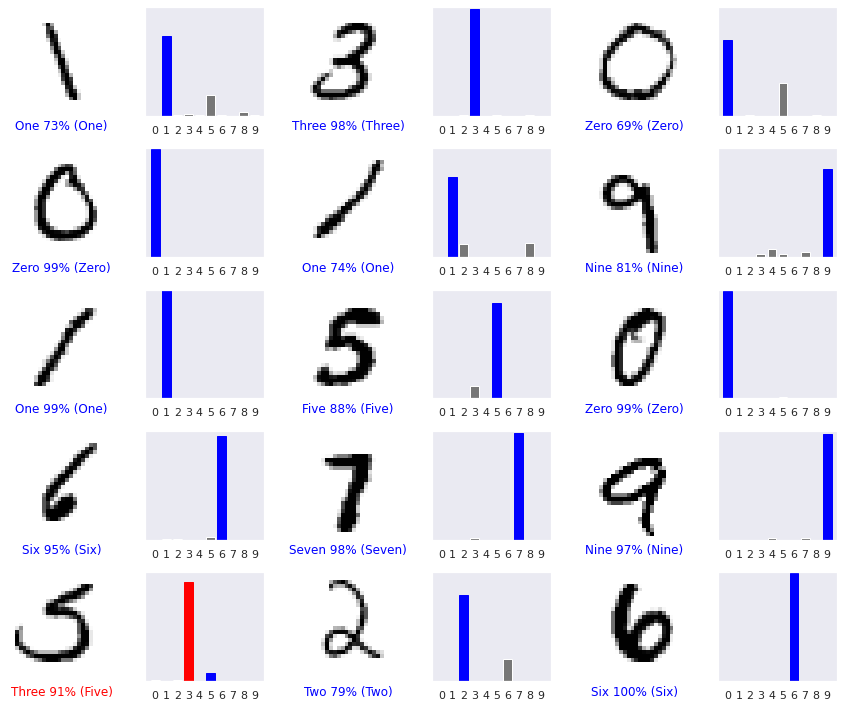

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels.iloc, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels.iloc)
plt.tight_layout()
plt.show()

## Use the trained model

Finally, use the trained model to make a prediction about a single image.

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[7.8207384e-05 3.3159493e-05 7.1680127e-03 9.8249555e-01 3.9062729e-06
  4.9414993e-03 1.9369124e-06 3.6624169e-07 5.2707740e-03 6.5122149e-06]]


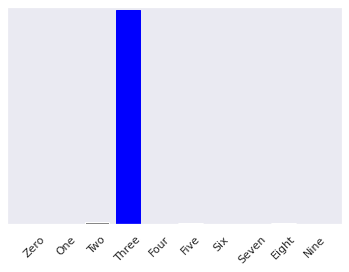

In [ ]:
plot_value_array(1, predictions_single[0], test_labels.iloc)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

`tf.keras.Model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [ ]:
np.argmax(predictions_single[0])

3

And the model predicts a label as expected.

## Experiment 2: 2 layers, 20 Nodes

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(20)
])

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's [*compile*](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) step:

* [*Loss function*](https://www.tensorflow.org/api_docs/python/tf/keras/losses) —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* [*Optimizer*](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) —This is how the model is updated based on the data it sees and its loss function.
* [*Metrics*](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


### Feed the model

To start training,  call the [`model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method—so called because it "fits" the model to the training data:

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1050/1050 [==============================] - 3s 2ms/step - loss: 1.9597 - accuracy: 0.4941
Epoch 2/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.9655 - accuracy: 0.7766
Epoch 3/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.6173 - accuracy: 0.8464
Epoch 4/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.4838 - accuracy: 0.8732
Epoch 5/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.4188 - accuracy: 0.8856
Epoch 6/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3819 - accuracy: 0.8942
Epoch 7/10
1050/1050 [==============================] - 3s 2ms/step - loss: 0.3580 - accuracy: 0.8992
Epoch 8/10
1050/1050 [==============================] - 3s 2ms/step - loss: 0.3412 - accuracy: 0.9025
Epoch 9/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3286 - accuracy: 0.9053
Epoch 10/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.318

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 20)                2580      
                                                                 
Total params: 103,060
Trainable params: 103,060
Non-trainable params: 0
_________________________________________________________________


In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

263/263 - 0s - loss: 0.3134 - accuracy: 0.9089 - 469ms/epoch - 2ms/step

Test accuracy: 0.9089285731315613


In [ ]:
history = model.fit(train_images,train_labels, validation_data = (test_images,  test_labels), 
                    epochs=10, verbose = 1)


Epoch 1/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.3099 - accuracy: 0.9107 - val_loss: 0.3080 - val_accuracy: 0.9093
Epoch 2/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.3028 - accuracy: 0.9126 - val_loss: 0.2989 - val_accuracy: 0.9112
Epoch 3/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2964 - accuracy: 0.9131 - val_loss: 0.2945 - val_accuracy: 0.9132
Epoch 4/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2906 - accuracy: 0.9154 - val_loss: 0.2898 - val_accuracy: 0.9145
Epoch 5/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2850 - accuracy: 0.9170 - val_loss: 0.2865 - val_accuracy: 0.9140
Epoch 6/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2802 - accuracy: 0.9178 - val_loss: 0.2803 - val_accuracy: 0.9169
Epoch 7/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2752 - accuracy: 0.9194 - val_loss: 0.2757 - val_accuracy:

In [ ]:
results = {}
results['experiment1'] = history.history

In [ ]:
def plot_history(model):
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
    ax1.plot(model.history.history['val_accuracy'], 'r', label = 'Validation Accuracy')
    ax1.plot(model.history.history['accuracy'], 'b',label = 'Training Accuracy')
    ax1.set_title('Training and Validation Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.grid()
    ax1.legend(loc = "upper left")
    ax2.plot(model.history.history['val_loss'], 'r',label = 'Validation Loss')
    ax2.plot(model.history.history['loss'], 'b',label = 'Training Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.set_title('Training and Validation loss')
    ax2.grid()
    plt.legend(loc = "upper left")

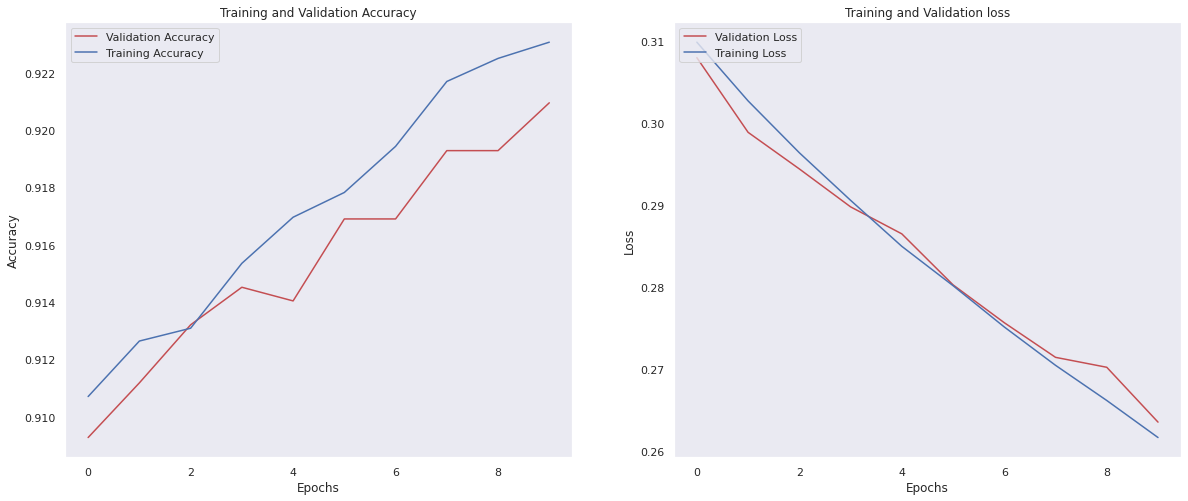

In [ ]:
plot_history(model)

In [ ]:
def plot_confusion_matrix(y_true,y_pred):
    fig = plt.figure(figsize=(12,12))
    #matrix = confusion_matrix(y_true, y_pred)
    sns.heatmap(confusion_matrix(y_true, y_pred),annot=True,fmt='5.0f',cmap="Blues")
    plt.title('Confusion Matrix : Actual v/s Predicted', y=1.05, size=15)
    ax = fig.add_subplot(111)
    plt.xlabel("Predicted Digits")
    plt.ylabel("Actual Digits")
    plt.show()

In [ ]:
model_predict = model.predict(test_images)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


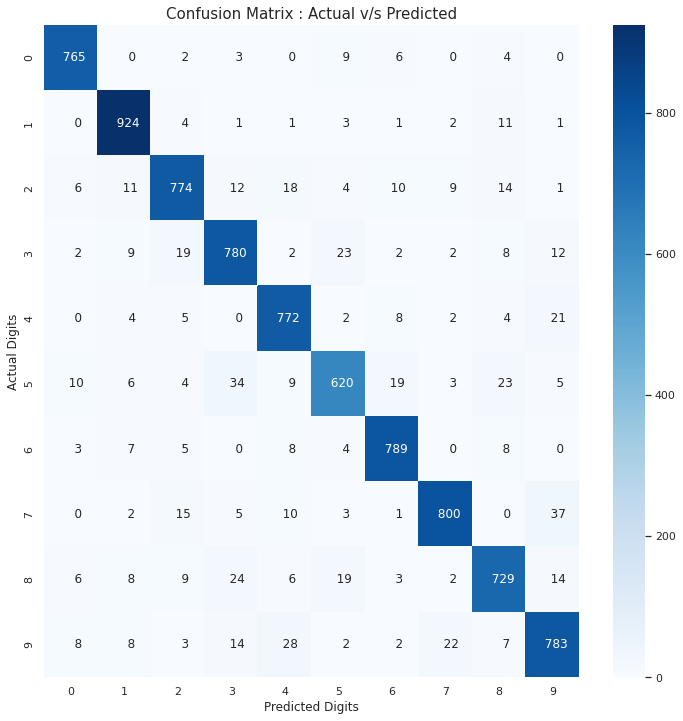

In [ ]:
plot_confusion_matrix(test_labels, model_predict.argmax(axis = 1))


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. For more information, see the following:
*   [Demonstrate overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
*   [Strategies to prevent overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

In [ ]:
modelT_predict = model.predict(train_images)

In [ ]:
print("Overall training Accuracy Score: ", accuracy_score(train_labels, modelT_predict.argmax(axis = 1)))
print(classification_report(train_labels, modelT_predict.argmax(axis = 1)))

print("Overall test Accuracy Score: ", accuracy_score(test_labels, model_predict.argmax(axis = 1)))
print(classification_report(test_labels, model_predict.argmax(axis = 1)))


Overall training Accuracy Score:  0.9250892857142857
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      3343
           1       0.95      0.98      0.96      3736
           2       0.90      0.92      0.91      3318
           3       0.90      0.90      0.90      3492
           4       0.92      0.94      0.93      3254
           5       0.92      0.86      0.89      3062
           6       0.95      0.96      0.95      3313
           7       0.94      0.93      0.94      3528
           8       0.90      0.89      0.90      3243
           9       0.90      0.91      0.90      3311

    accuracy                           0.93     33600
   macro avg       0.92      0.92      0.92     33600
weighted avg       0.92      0.93      0.92     33600

Overall test Accuracy Score:  0.920952380952381
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       789
           1       0.94      0.

### Make predictions

With the model trained, you can use it to make predictions about some images.
Attach a softmax layer to convert the model's linear outputs—[logits](https://developers.google.com/machine-learning/glossary#logits)—to probabilities, which should be easier to interpret.

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [ ]:
predictions[11]

array([3.5055225e-05, 1.2952978e-09, 5.5330991e-05, 9.4652535e-07,
       2.0451851e-02, 9.2340115e-06, 3.6712096e-05, 8.5953530e-03,
       5.1320222e-04, 9.7030234e-01, 1.2833481e-10, 1.2022641e-10,
       1.1906985e-10, 1.3986895e-10, 1.4720619e-10, 1.6515077e-10,
       1.4009001e-10, 1.1362916e-10, 1.5751735e-10, 1.3999546e-10],
      dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [ ]:
np.argmax(predictions[11])

9

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

In [ ]:
type(test_labels)

pandas.core.series.Series

In [ ]:
test_labels.shape

(8400,)

In [ ]:
test_labels.iloc[11]

9

Graph this to look at the full set of 10 class predictions.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(20), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

In [ ]:
type(test_images)
test_labels.iloc[11]

9

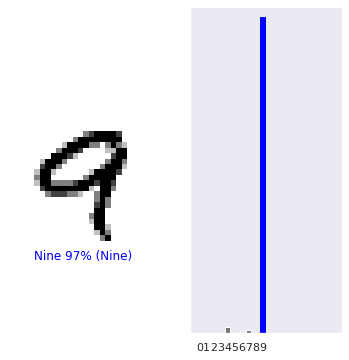

In [ ]:
i = 11
plt.figure(figsize=(6,6))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels.iloc, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels.iloc)
plt.show()

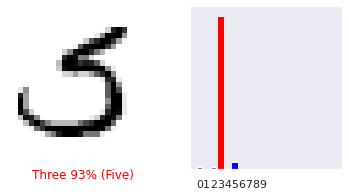

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels.iloc, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels.iloc)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

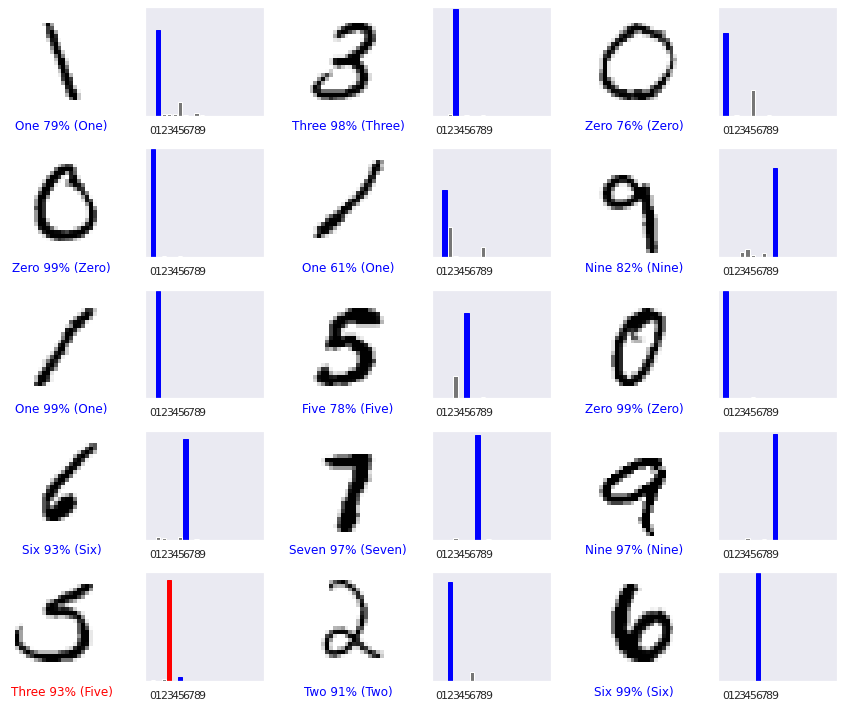

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels.iloc, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels.iloc)
plt.tight_layout()
plt.show()

And the model predicts a label as expected.

##Experiment 3: 5 layers, 20 Nodes

## Use the trained model

Finally, use the trained model to make a prediction about a single image.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(20)
])

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's [*compile*](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) step:

* [*Loss function*](https://www.tensorflow.org/api_docs/python/tf/keras/losses) —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* [*Optimizer*](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) —This is how the model is updated based on the data it sees and its loss function.
* [*Metrics*](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


### Feed the model

To start training,  call the [`model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method—so called because it "fits" the model to the training data:

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1050/1050 [==============================] - 4s 4ms/step - loss: 1.2985 - accuracy: 0.5414
Epoch 2/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.5782 - accuracy: 0.8182
Epoch 3/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.4415 - accuracy: 0.8668
Epoch 4/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.3508 - accuracy: 0.8937
Epoch 5/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.2886 - accuracy: 0.9131
Epoch 6/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.2386 - accuracy: 0.9267
Epoch 7/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.2021 - accuracy: 0.9386
Epoch 8/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.1729 - accuracy: 0.9466
Epoch 9/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.1516 - accuracy: 0.9534
Epoch 10/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.133

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 256)               200960    
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 20)                660       
                                                                 
Total params: 244,852
Trainable params: 244,852
Non-tr

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

263/263 - 1s - loss: 0.1529 - accuracy: 0.9532 - 597ms/epoch - 2ms/step

Test accuracy: 0.9532142877578735


In [ ]:
history = model.fit(train_images,train_labels, validation_data = (test_images,  test_labels), 
                    epochs=10, verbose = 1)


Epoch 1/10
1050/1050 [==============================] - 5s 4ms/step - loss: 0.1204 - accuracy: 0.9620 - val_loss: 0.1444 - val_accuracy: 0.9560
Epoch 2/10
1050/1050 [==============================] - 5s 4ms/step - loss: 0.1059 - accuracy: 0.9679 - val_loss: 0.1504 - val_accuracy: 0.9558
Epoch 3/10
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0968 - accuracy: 0.9692 - val_loss: 0.1296 - val_accuracy: 0.9612
Epoch 4/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0859 - accuracy: 0.9738 - val_loss: 0.1372 - val_accuracy: 0.9615
Epoch 5/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0809 - accuracy: 0.9744 - val_loss: 0.1228 - val_accuracy: 0.9633
Epoch 6/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0729 - accuracy: 0.9775 - val_loss: 0.1510 - val_accuracy: 0.9573
Epoch 7/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0650 - accuracy: 0.9793 - val_loss: 0.1255 - val_accuracy:

In [ ]:
results = {}
results['experiment1'] = history.history

In [ ]:
def plot_history(model):
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
    ax1.plot(model.history.history['val_accuracy'], 'r', label = 'Validation Accuracy')
    ax1.plot(model.history.history['accuracy'], 'b',label = 'Training Accuracy')
    ax1.set_title('Training and Validation Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.grid()
    ax1.legend(loc = "upper left")
    ax2.plot(model.history.history['val_loss'], 'r',label = 'Validation Loss')
    ax2.plot(model.history.history['loss'], 'b',label = 'Training Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.set_title('Training and Validation loss')
    ax2.grid()
    plt.legend(loc = "upper left")

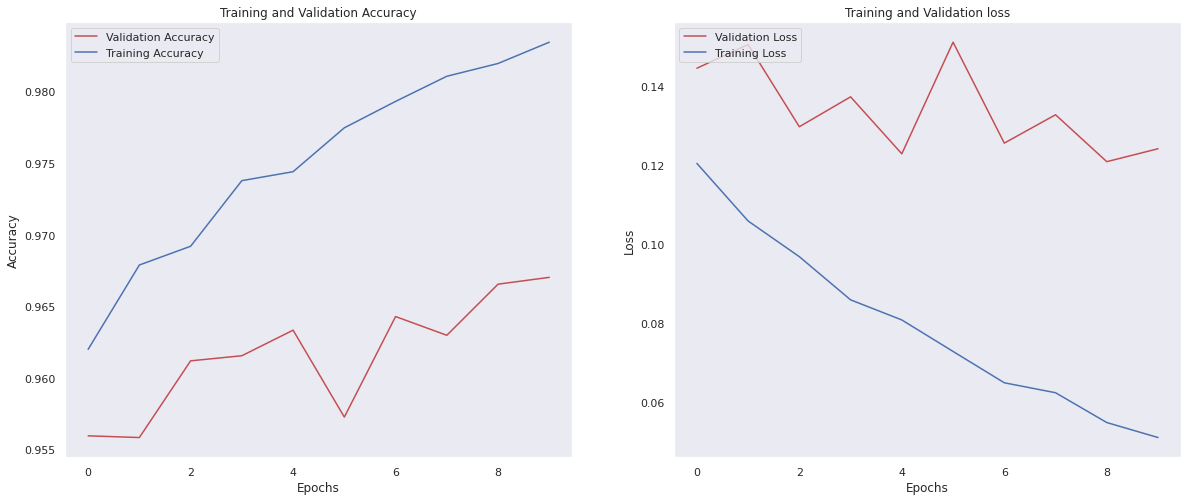

In [ ]:
plot_history(model)

In [ ]:
def plot_confusion_matrix(y_true,y_pred):
    fig = plt.figure(figsize=(12,12))
    #matrix = confusion_matrix(y_true, y_pred)
    sns.heatmap(confusion_matrix(y_true, y_pred),annot=True,fmt='5.0f',cmap="Blues")
    plt.title('Confusion Matrix : Actual v/s Predicted', y=1.05, size=15)
    ax = fig.add_subplot(111)
    plt.xlabel("Predicted Digits")
    plt.ylabel("Actual Digits")
    plt.show()

In [ ]:
model_predict = model.predict(test_images)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


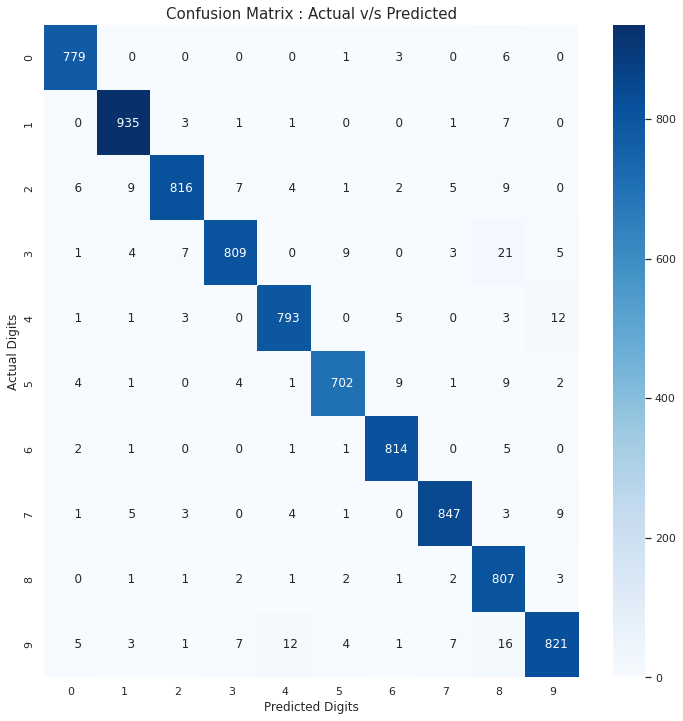

In [ ]:
plot_confusion_matrix(test_labels, model_predict.argmax(axis = 1))


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. For more information, see the following:
*   [Demonstrate overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
*   [Strategies to prevent overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

In [ ]:
modelT_predict = model.predict(train_images)

In [ ]:
print("Overall training Accuracy Score: ", accuracy_score(train_labels, modelT_predict.argmax(axis = 1)))
print(classification_report(train_labels, modelT_predict.argmax(axis = 1)))

print("Overall test Accuracy Score: ", accuracy_score(test_labels, model_predict.argmax(axis = 1)))
print(classification_report(test_labels, model_predict.argmax(axis = 1)))


Overall training Accuracy Score:  0.9870535714285714
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3343
           1       0.98      1.00      0.99      3736
           2       1.00      0.98      0.99      3318
           3       0.99      0.97      0.98      3492
           4       0.99      0.98      0.99      3254
           5       0.99      0.98      0.99      3062
           6       0.99      1.00      0.99      3313
           7       0.99      0.99      0.99      3528
           8       0.95      1.00      0.97      3243
           9       0.99      0.97      0.98      3311

    accuracy                           0.99     33600
   macro avg       0.99      0.99      0.99     33600
weighted avg       0.99      0.99      0.99     33600

Overall test Accuracy Score:  0.9670238095238095
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       789
           1       0.97      0

### Make predictions

With the model trained, you can use it to make predictions about some images.
Attach a softmax layer to convert the model's linear outputs—[logits](https://developers.google.com/machine-learning/glossary#logits)—to probabilities, which should be easier to interpret.

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [ ]:
predictions[11]

array([1.2206928e-09, 2.5520348e-09, 7.1187845e-10, 1.2157791e-06,
       2.9639496e-05, 3.2161829e-09, 7.5680610e-16, 5.5994599e-07,
       6.4885562e-06, 9.9996209e-01, 1.0594823e-17, 2.9443345e-17,
       9.1849091e-19, 9.0395836e-18, 3.1220936e-16, 2.7198044e-17,
       1.1784803e-17, 2.2332059e-19, 2.0506835e-17, 6.0175704e-19],
      dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [ ]:
np.argmax(predictions[11])

9

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

In [ ]:
type(test_labels)

pandas.core.series.Series

In [ ]:
test_labels.shape

(8400,)

In [ ]:
test_labels.iloc[11]

9

Graph this to look at the full set of 10 class predictions.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(20), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

In [ ]:
type(test_images)
test_labels.iloc[11]

9

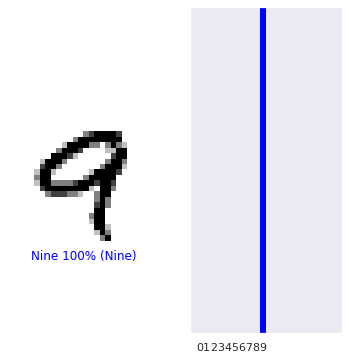

In [ ]:
i = 11
plt.figure(figsize=(6,6))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels.iloc, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels.iloc)
plt.show()

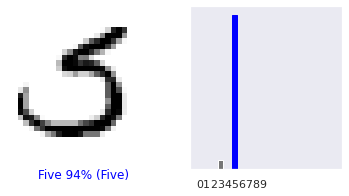

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels.iloc, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels.iloc)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

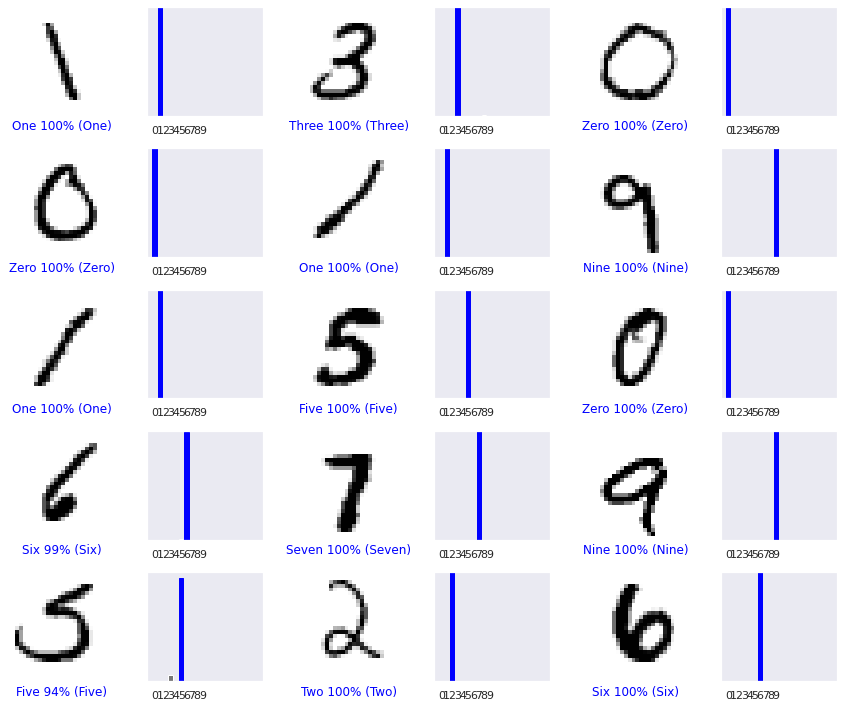

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels.iloc, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels.iloc)
plt.tight_layout()
plt.show()

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[2.1054409e-13 1.5526595e-05 1.6484619e-09 9.9837804e-01 1.1464204e-11
  5.7857136e-08 2.1133857e-18 1.5680637e-09 1.5965898e-03 9.8123382e-06
  2.2568813e-26 2.0888353e-26 1.7764795e-28 1.5253988e-27 1.4693829e-25
  5.0456114e-26 3.5753757e-27 9.2615064e-29 4.0723184e-27 4.3772815e-28]]


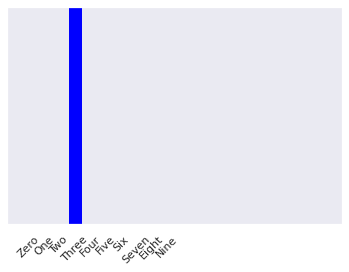

In [ ]:
plot_value_array(1, predictions_single[0], test_labels.iloc)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

`tf.keras.Model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [ ]:
np.argmax(predictions_single[0])

3

##Experiment 4: 5 layers, 10 Nodes

## Use the trained model

Finally, use the trained model to make a prediction about a single image.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(20)
])

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's [*compile*](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) step:

* [*Loss function*](https://www.tensorflow.org/api_docs/python/tf/keras/losses) —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* [*Optimizer*](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) —This is how the model is updated based on the data it sees and its loss function.
* [*Metrics*](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


### Feed the model

To start training,  call the [`model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method—so called because it "fits" the model to the training data:

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1050/1050 [==============================] - 5s 4ms/step - loss: 1.5784 - accuracy: 0.4335
Epoch 2/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.6170 - accuracy: 0.8036
Epoch 3/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.4200 - accuracy: 0.8696
Epoch 4/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.3490 - accuracy: 0.8921
Epoch 5/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.2974 - accuracy: 0.9086
Epoch 6/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.2583 - accuracy: 0.9196
Epoch 7/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.2254 - accuracy: 0.9303
Epoch 8/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.1976 - accuracy: 0.9388
Epoch 9/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.1762 - accuracy: 0.9446
Epoch 10/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.155

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 256)               200960    
                                                                 
 dense_17 (Dense)            (None, 128)               32896     
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 20)                660       
                                                                 
Total params: 244,852
Trainable params: 244,852
Non-t

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

263/263 - 1s - loss: 0.1705 - accuracy: 0.9483 - 566ms/epoch - 2ms/step

Test accuracy: 0.9483333230018616


In [ ]:
history = model.fit(train_images,train_labels, validation_data = (test_images,  test_labels), 
                    epochs=10, verbose = 1)


Epoch 1/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.1413 - accuracy: 0.9567 - val_loss: 0.1615 - val_accuracy: 0.9499
Epoch 2/10
1050/1050 [==============================] - 5s 4ms/step - loss: 0.1272 - accuracy: 0.9605 - val_loss: 0.1426 - val_accuracy: 0.9573
Epoch 3/10
1050/1050 [==============================] - 5s 4ms/step - loss: 0.1172 - accuracy: 0.9627 - val_loss: 0.1519 - val_accuracy: 0.9545
Epoch 4/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.1060 - accuracy: 0.9668 - val_loss: 0.1381 - val_accuracy: 0.9573
Epoch 5/10
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0985 - accuracy: 0.9689 - val_loss: 0.1215 - val_accuracy: 0.9631
Epoch 6/10
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0881 - accuracy: 0.9729 - val_loss: 0.1302 - val_accuracy: 0.9625
Epoch 7/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0816 - accuracy: 0.9740 - val_loss: 0.1273 - val_accuracy:

In [ ]:
results = {}
results['experiment1'] = history.history

In [ ]:
def plot_history(model):
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
    ax1.plot(model.history.history['val_accuracy'], 'r', label = 'Validation Accuracy')
    ax1.plot(model.history.history['accuracy'], 'b',label = 'Training Accuracy')
    ax1.set_title('Training and Validation Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.grid()
    ax1.legend(loc = "upper left")
    ax2.plot(model.history.history['val_loss'], 'r',label = 'Validation Loss')
    ax2.plot(model.history.history['loss'], 'b',label = 'Training Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.set_title('Training and Validation loss')
    ax2.grid()
    plt.legend(loc = "upper left")

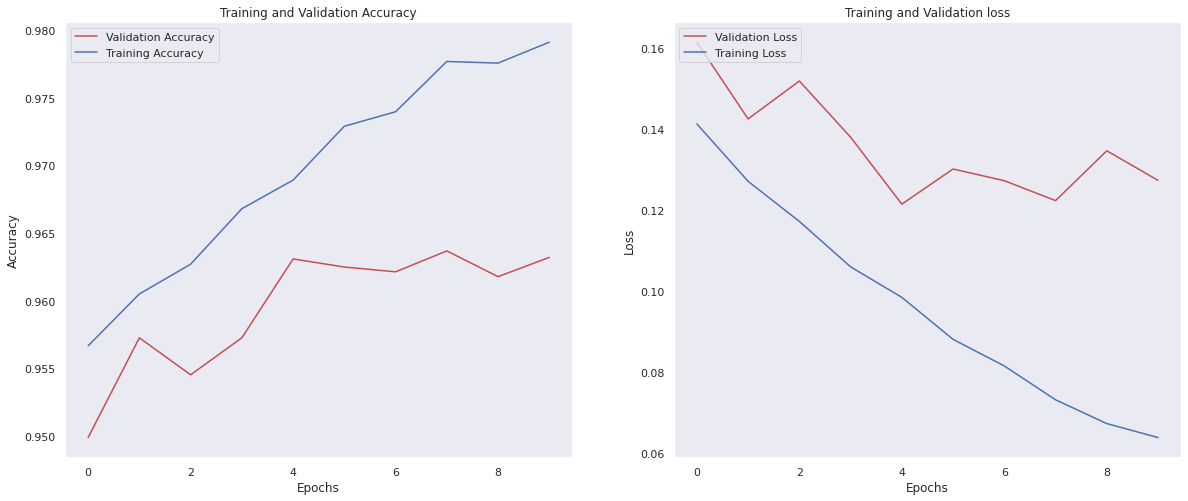

In [ ]:
plot_history(model)

In [ ]:
def plot_confusion_matrix(y_true,y_pred):
    fig = plt.figure(figsize=(12,12))
    #matrix = confusion_matrix(y_true, y_pred)
    sns.heatmap(confusion_matrix(y_true, y_pred),annot=True,fmt='5.0f',cmap="Blues")
    plt.title('Confusion Matrix : Actual v/s Predicted', y=1.05, size=15)
    ax = fig.add_subplot(111)
    plt.xlabel("Predicted Digits")
    plt.ylabel("Actual Digits")
    plt.show()

In [ ]:
model_predict = model.predict(test_images)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


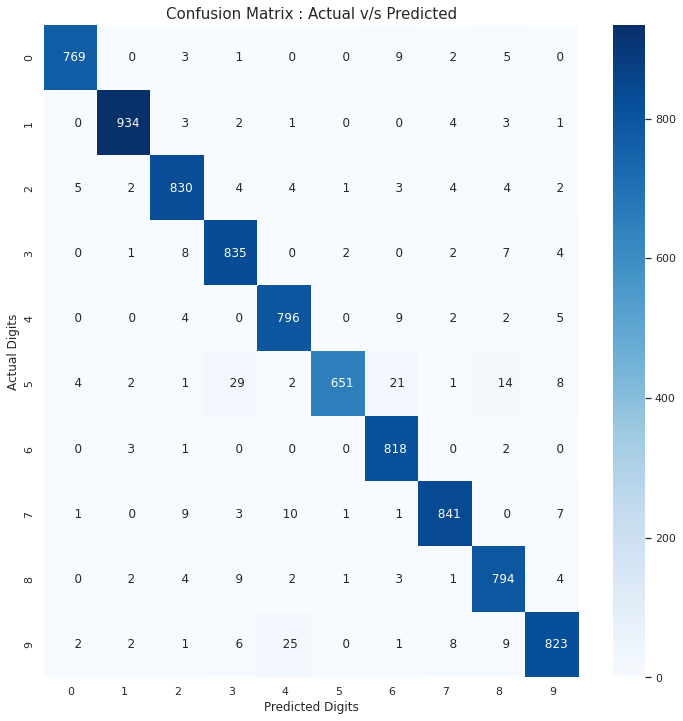

In [ ]:
plot_confusion_matrix(test_labels, model_predict.argmax(axis = 1))


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. For more information, see the following:
*   [Demonstrate overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
*   [Strategies to prevent overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

In [ ]:
modelT_predict = model.predict(train_images)

In [ ]:
print("Overall training Accuracy Score: ", accuracy_score(train_labels, modelT_predict.argmax(axis = 1)))
print(classification_report(train_labels, modelT_predict.argmax(axis = 1)))

print("Overall test Accuracy Score: ", accuracy_score(test_labels, model_predict.argmax(axis = 1)))
print(classification_report(test_labels, model_predict.argmax(axis = 1)))


Overall training Accuracy Score:  0.9810714285714286
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3343
           1       0.99      0.99      0.99      3736
           2       0.98      0.99      0.99      3318
           3       0.96      0.98      0.97      3492
           4       0.97      0.99      0.98      3254
           5       1.00      0.92      0.96      3062
           6       0.98      1.00      0.99      3313
           7       0.99      0.99      0.99      3528
           8       0.97      0.99      0.98      3243
           9       0.98      0.97      0.98      3311

    accuracy                           0.98     33600
   macro avg       0.98      0.98      0.98     33600
weighted avg       0.98      0.98      0.98     33600

Overall test Accuracy Score:  0.9632142857142857
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       789
           1       0.99      0